In [3]:
import pickle
import numpy as np
import os
import matplotlib.pyplot as plt
import utils.experiment_utils as exp 
import utils.plot_utils as plot

In [4]:
DATA_DIR = "/home/samuel/Documents/Actor-Expert/RLControl/results/Pendulum-v0_ForwardKLresults"
DATA_FILE = "data.pkl"

# Get data
with open(os.path.join(DATA_DIR, DATA_FILE), "rb") as in_file:
    data = pickle.load(in_file)

In [5]:
hp_returns = exp.get_best_hp(data, "eval", after=0)
hp_returns[-20:]

((33, -1459.9860376704653),
 (5, -1459.0140228270423),
 (4, -1441.0944221941934),
 (30, -1439.6685228531308),
 (26, -1436.1639895685428),
 (25, -1429.8350093264605),
 (24, -1427.9623151571134),
 (21, -1427.942088742132),
 (19, -1425.6333156023563),
 (6, -1425.3232393752794),
 (3, -1419.6230003997578),
 (31, -1418.1069444690695),
 (16, -1413.5305200744253),
 (34, -1402.871437915491),
 (27, -1401.786637920594),
 (2, -1382.1366281912735),
 (10, -1353.8453595034327),
 (1, -1303.3180332822365),
 (18, -1292.4395167277223),
 (0, -1265.5634585829655))

(<Figure size 864x432 with 1 Axes>,
 <AxesSubplot:title={'center':'Average Eval Return per Run with Standard Error'}, xlabel='Timesteps', ylabel='Average Return'>)

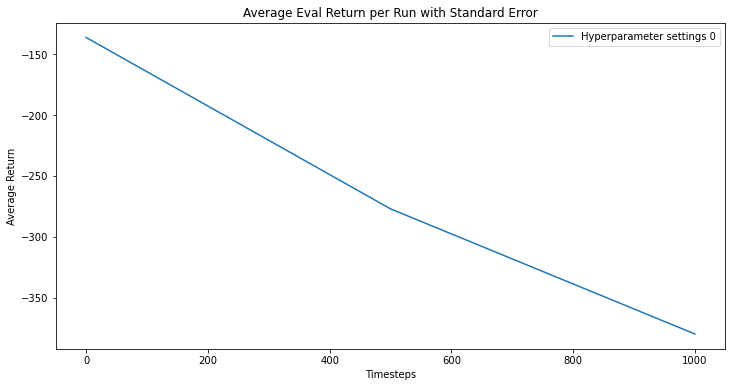

In [6]:
# Plot the mean return per run, smoothing over the passed 10,000 time steps
plot.plot_mean_with_stderr(data, "eval", [0], smooth_over=10)
# plot.plot_mean_with_stderr(data, "train", [0, 4, 2], smooth_over=10)

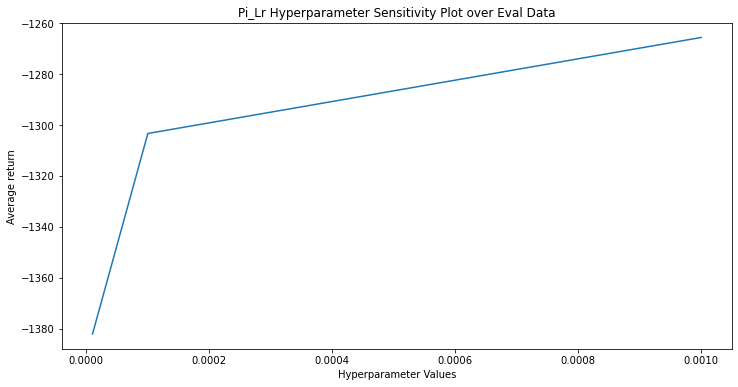

In [13]:
# These currently fail because we don't have a full sweep over the hyperparameters and so the plot looks for something that doesn't exist

plot.hyperparam_sensitivity_plot_by_settings_index(data, "eval", "pi_lr", 0)